## Exploratory Analysis of Tmdb Movies
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href='#Wrangling'>Data Wrangling</a></li>
    <li><a href='#eda'> Data Exploration</a></li>
    <li><a href='#conclusion'>Conclusion</a></li>
</ul>
     


<a id="#intro"></a>
## Introduction
What  are the factors that determines if a movie will be a  success or not. Are there movie companies that are consistent in making good movies or are the casts responsible ?. Does a movie runtime influences the viewer choice or does the production budget determines if a movie will be a success?.All these and more we will disect during the course of this project. The dataset used  for this project was the Tmdb dataset which was gotten from Kaggle. During the course of the project i will use some important python libraries like pandas and numpy for data cleaning and manipulation while seaborn and Matplotlib will be used for visualization.

### Questions
At the end of the end of this project we should be able to answer the following questions.

1. What are the 5 most successful movies.

2. Which of the genres are mostly associated with movies with high revenue.
3. which of the casts are most known to star in movies with high revenue.
4. what kind of properties are associated with movies with high revenues .
5. Does the budget of the movie influence revenue.
6. which of the  production companies are associated with high revenue movies.
7. What year was the highest revenue made.

### Data Description

|Column    || Description |
|:-        ||:-           |
|          ||             |
|imdb_id ||This unique identifier for a particular movie|
|popularity||Popularity rating of particular movie.It indicates how much a title's page is visited in the current week|
|budget|| The total amount used for the production of the movie|
|revenue||The total amount made from the movie|
|original_title|| Name of the movie|
|cast||Actors and Actresses of the movie|
|director||Movie director|
|genres||Movie genres|
|production_companies||Companies that produce the movie|
|release_date||Movie release date|
|vote_count||Number of Votes|
|vote_average||Average ratings|
|release_year||The year movie was release|


Import the necessary liabraries for this project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import iqr
import warnings
FutureWarning('ignore')
%matplotlib inline
warnings.filterwarnings('ignore')

<a id='#Wrangling'></a>
## 2. Data Wrangling
This section entails the loading,cleaning and transforming the data. This can be done by dropping  columns that are not needed for the analysis, remove rows that has missing values and also rows that does not meet realistic standards. 

In [2]:
# load the dataset
imdb= pd.read_csv('tmdb-movies.csv')
imdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# the see the info about the dataset
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

from the above we can the datasets has about 21 columns and 10866 columns.

In [4]:
# to show the descriptive stats about the dataset
imdb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


In [5]:
## to check th number of missing values found in each of the columns
imdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# drop columns
imdb.drop(['id','imdb_id','homepage','tagline','keywords'],axis=1,inplace=True)

In [7]:
imdb.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# drop rows with the runtoime of zero minute
zero_runtime=imdb[imdb['runtime']== 0]

In [9]:
imdb.drop(zero_runtime.index,axis=0,inplace=True)

In [10]:
# remove rows with missing value
imdb.dropna(inplace=True)

In [11]:
imdb.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In order to see the different  trends from the data. I will the classify the movies into two groups: high-revenue movies and low-revenue movies. Those movies whose revenue is above average revenue will be grouped as 'low-revenue' and the rest will be 'high-revenue'.

In [12]:
#find the average revenue
revenue_mean = imdb['revenue'].mean()
revenue_mean

44285690.60532787

In [13]:
# create a function to show with of the movies are have low revenue or high revenue.

def revenue_grade(df):
    
    
    '''
    Parameters
        Return two strings
           High revenue : if the revenue is greater than or eqaul to revenue mean

           low revenue : if the revenue is less than revenue mean.
    '''
      
    
    if df['revenue'] >= revenue_mean:
        return 'high revenue'
    else:
        return 'low revenue'
    # create a new by applying the above function
imdb['revenue_grade']= imdb.apply(revenue_grade,axis=1)

In [14]:
# convert the release date column to a datatime datatype
imdb['release_date']= pd.to_datetime(imdb['release_date'],format='%m/%d/%y')



In [15]:
imdb.shape

(9760, 17)

At the end of Data Wrangling we were left with 9760 rows and 17 columns in the dataset.

#### Data Wrangling Summary
* I removed the columns that are not needed fro this analysis.
* Rows whose runtime has zero minutes were also removed.
* Rows with missing values were also removed
* I converted the release year column to datetime datatype.
* Also included a new column called revenue grade


<a id='#eda'></a>
## 2.Data Exploration 
in this section, we will be using visualizations to answer some questions.

### 1. What are the most successful movies.
One the ways to judge if a movie is successful is the amount of revenue it was able to generate.

In [16]:
top_movies=imdb.nlargest(5,'revenue')[['original_title','revenue']]
top_movies

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810


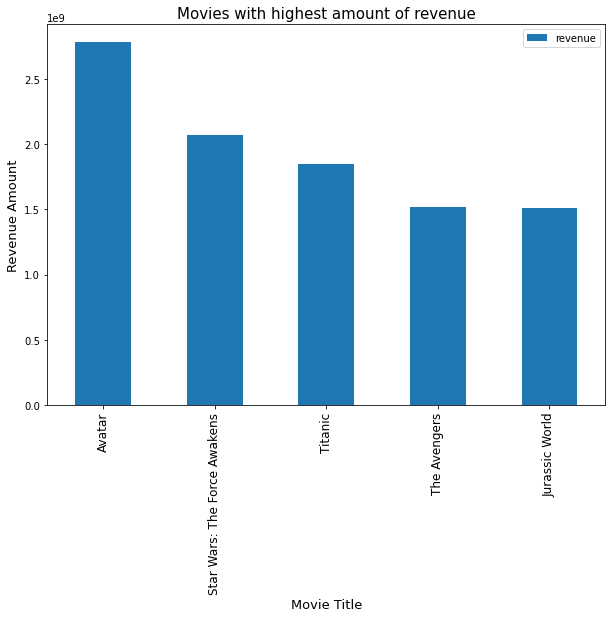

In [17]:

top_movies.plot('original_title','revenue',kind='bar',figsize=(10,7))
plt.xlabel('Movie Title',fontsize=13)
plt.ylabel('Revenue Amount',fontsize=13)
plt.xticks(fontsize=12)
plt.title('Movies with highest amount of revenue',fontsize=15)
plt.show()

The illustrative graph above shows that Avatar was the movie with highest amount of revenue, with the value of 2781505847

### 2. Which of the genres are mostly associated with highly rated movies and Lowly rated movies

In [18]:
# create function that splits the column by '|'
def multi_column(col_series):
    result_df = col_series.to_frame()
    options = []
    for index, values in col_series[col_series.notnull()].iteritems():
        for option in values.split("|"):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[index,option]= True
    return result_df[options]

In [19]:
high_revenue_movies =imdb.query('revenue >= {}'.format(revenue_mean))
low_revenue_movies = imdb.query('revenue < {}'.format(revenue_mean))

In [20]:
genre_high_revenue = multi_column(high_revenue_movies['genres'])
high_revenue_genre_total = genre_high_revenue.sum().sort_values(ascending=False).nlargest(10)
high_revenue_genre_total

Drama              793
Comedy             762
Action             693
Thriller           618
Adventure          533
Romance            331
Crime              328
Family             321
Science Fiction    299
Fantasy            275
dtype: int64

In [21]:
#function that creates a barplot
def create_barplot(x,y,title,xlabel,ylabel):
    plt.figure(dpi=100)
    plt.title(title)
    sns.barplot(x=high_revenue_genre_total, y=high_revenue_genre_total.index)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.barplot(x,y)
    plt.show()

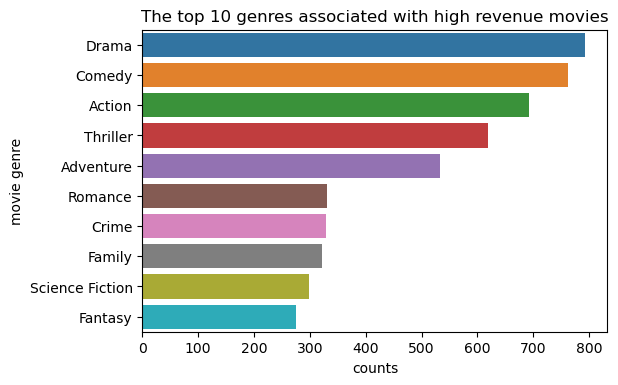

In [22]:
create_barplot(high_revenue_genre_total,high_revenue_genre_total.index,'The top 10 genres associated with high revenue movies','counts','movie genre')

In [23]:
genre_low_revenue = multi_column(low_revenue_movies['genres'])

low_revenue_genre_total = genre_low_revenue.sum().sort_values(ascending=False).nlargest(10)
low_revenue_genre_total


Drama              3570
Comedy             2667
Thriller           2127
Action             1542
Horror             1339
Romance            1237
Crime               972
Adventure           850
Science Fiction     837
Family              773
dtype: int64

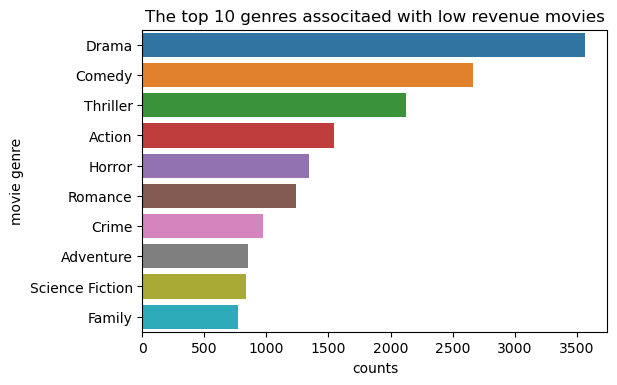

In [24]:
create_barplot(low_revenue_genre_total,low_revenue_genre_total.index,'The top 10 genres associtaed with low revenue movies','counts','movie genre')

The bargraphs indicates that the Drama genre associate with both high revenue movies and movie that made low revenue the most. 

### 3. which of the casts are most known to star in movies with high revenue.

In [25]:
cast_high_revenue = multi_column(high_revenue_movies['cast'])
cast_high_revenue_total = cast_high_revenue.sum().sort_values(ascending=False).head(5)
cast_high_revenue_total

Bruce Willis          34
Robert De Niro        34
Tom Cruise            31
Tom Hanks             29
Sylvester Stallone    28
dtype: int64

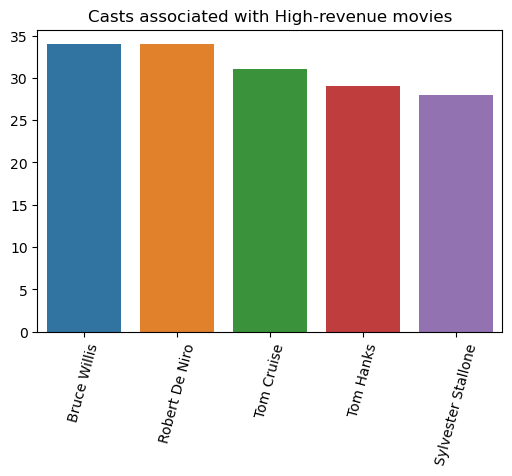

In [26]:
plt.figure(dpi=100)
plt.title('Casts associated with High-revenue movies')
plt.xticks(rotation=75)
sns.barplot(x=cast_high_revenue_total.index,y=cast_high_revenue_total)
plt.show()

From the graph above,Bruce Willis and  Robert De Niro starred the most in high-revenue movies. Both of them appeared in 34 movies.

 ### 4. what kind of properties are associated with movies with high revenues

In [27]:
# the descriptive properties associated with movies with low revenues
high_revenue_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2041.000000,2.041000e+03,2.041000e+03,2041.000000,2041.000000,2041.000000,2041.000000,2.041000e+03,2.041000e+03
mean,1.671759,5.407046e+07,1.927170e+08,112.949535,848.561489,6.289564,2002.097501,6.216373e+07,2.422787e+08
std,1.822736,4.920753e+07,2.090377e+08,24.203506,1081.542994,0.737958,10.483311,5.090611e+07,2.547234e+08
min,0.010335,0.000000e+00,4.433202e+07,44.000000,10.000000,3.400000,1960.000000,0.000000e+00,4.084947e+07
25%,0.760503,2.000000e+07,7.217958e+07,98.000000,205.000000,5.800000,1997.000000,2.579055e+07,9.126838e+07
50%,1.200825,4.000000e+07,1.195000e+08,110.000000,445.000000,6.300000,2004.000000,4.848671e+07,1.557366e+08
75%,1.928258,7.500000e+07,2.227242e+08,124.000000,1012.000000,6.800000,2010.000000,8.639749e+07,2.918792e+08
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


In [28]:
# the descriptive properties associated with movies with low revenues
low_revenue_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7719.000000,7.719000e+03,7.719000e+03,7719.000000,7719.000000,7719.000000,7719.000000,7.719000e+03,7.719000e+03
mean,0.437056,6.189488e+06,5.038598e+06,100.448374,78.563156,5.878469,2000.537505,8.146636e+06,8.165938e+06
std,0.404449,1.391453e+07,1.028964e+07,27.901576,164.584042,0.935228,13.615280,1.773814e+07,2.050128e+07
min,0.000188,0.000000e+00,0.000000e+00,3.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.201730,0.000000e+00,0.000000e+00,90.000000,16.000000,5.300000,1993.000000,0.000000e+00,0.000000e+00
50%,0.338412,0.000000e+00,0.000000e+00,97.000000,30.000000,5.900000,2005.000000,0.000000e+00,0.000000e+00
75%,0.543719,6.400000e+06,3.484729e+06,108.000000,75.000000,6.500000,2011.000000,8.620417e+06,4.457909e+06
max,7.192039,4.250000e+08,4.419668e+07,877.000000,5754.000000,8.700000,2015.000000,4.250000e+08,3.184705e+08


We will visualize some  of these properties using a boxplot

In [29]:
# function that create a boxplot
def create_boxplot(df,title,colseries):
    plt.figure(dpi=100)
    plt.title(title)
    sns.boxplot(data=df,y=colseries,x='revenue_grade')
    plt.show()

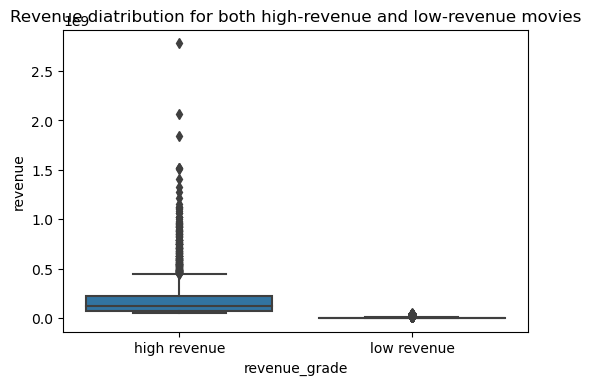

In [30]:
create_boxplot(imdb,'Revenue diatribution for both high-revenue and low-revenue movies','revenue')


The above graph is a boxplot that shows the some of the properties for both low revenue movies and high revenue movies. But we can also observe that the boxplot did not give out much information due to excessive outliers.In order to rectify this we have to remove outliers. 

In [31]:
# create a function that remove outliers.
def remove_outliers(df,col):
    q1 = np.quantile(df[col],0.25)
    q3= np.quantile(df[col],0.75)
    IQR = iqr(df[col])
    
    lower = (q1) -1.5 * IQR
    upper = (q3) + 1.5 * IQR
    
    revenue_col = df[~((df[col] < lower) |(df[col] > upper))]
    return revenue_col

In [32]:
# Remove outliers in revenue column
remove_revenue_outlier = remove_outliers(imdb,'revenue')

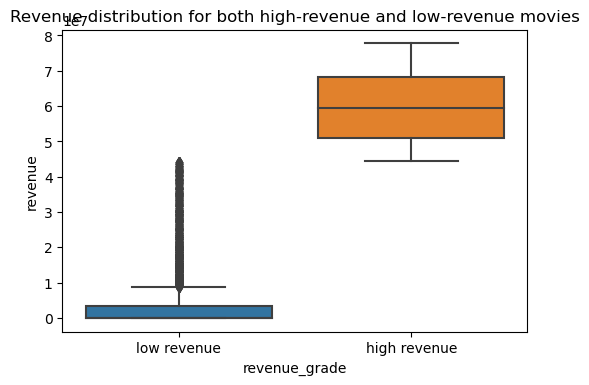

In [33]:
create_boxplot(remove_revenue_outlier,'Revenue distribution for both high-revenue and low-revenue movies','revenue')

In [34]:
# remove outliers in the budget column
remove_budget_outlier = remove_outliers(imdb,'budget')

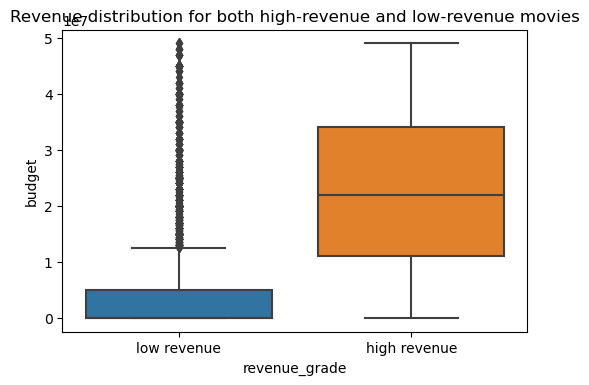

In [35]:
create_boxplot(remove_budget_outlier,'Revenue distribution for both high-revenue and low-revenue movies','budget')

In [36]:
# remove outliers from the popularity column
remove_popularity_outlier = remove_outliers(imdb,'popularity')

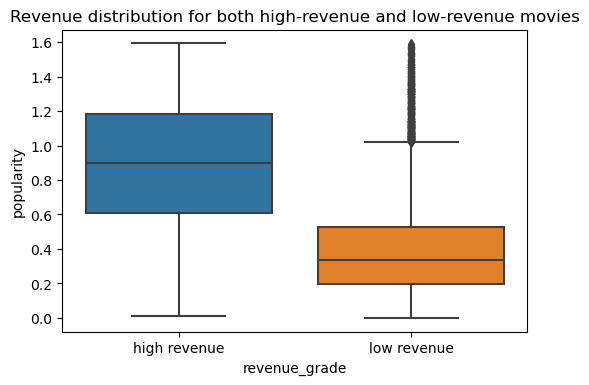

In [37]:
create_boxplot(remove_popularity_outlier,'Revenue distribution for both high-revenue and low-revenue movies','popularity')

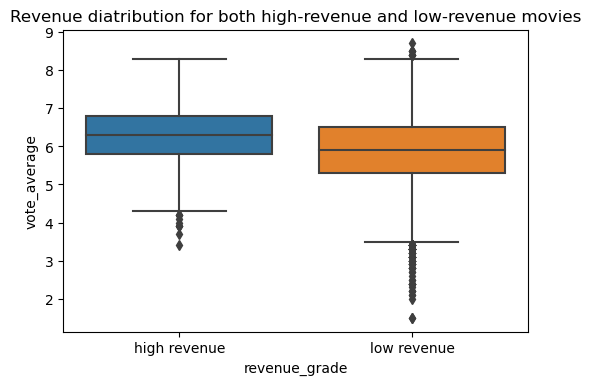

In [38]:
create_boxplot(imdb,'Revenue diatribution for both high-revenue and low-revenue movies','vote_average')

from the observed boxplots, we could draw our could see that movies with high revenues has a higher median value when comes to budget,popularity and vaote average rating.

### 5. Does the budget of the movie influence revenue.

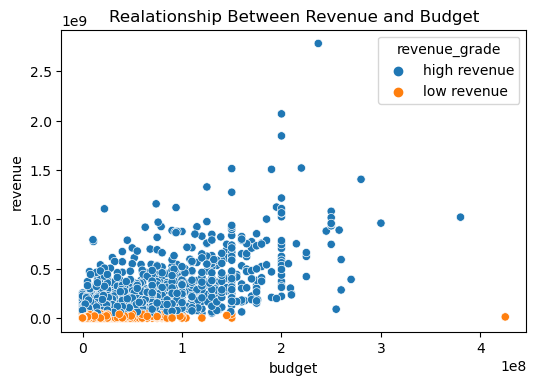

In [39]:
plt.figure(dpi=100)
plt.title('Realationship Between Revenue and Budget')
sns.scatterplot(data=imdb,x='budget',y='revenue',hue='revenue_grade')
plt.show()

As observed , there was indeed a weak positive relationship between budget and revenue.

### 6. which of the  production companies is associated with high revenue.

In [40]:
production_companies_df=multi_column(high_revenue_movies['production_companies'])
production_companies_df_total = production_companies_df.sum().sort_values(ascending=False).nlargest(10)
production_companies_df_total

Warner Bros.                              241
Universal Pictures                        238
Paramount Pictures                        188
Twentieth Century Fox Film Corporation    157
Columbia Pictures                         134
Walt Disney Pictures                      102
New Line Cinema                            95
Touchstone Pictures                        83
Relativity Media                           75
Columbia Pictures Corporation              70
dtype: int64

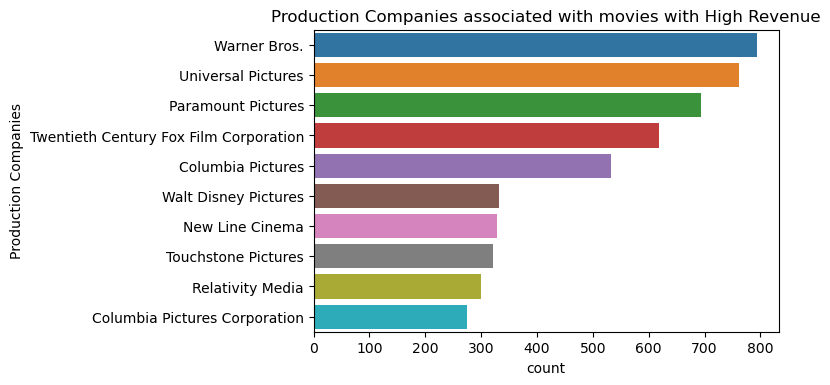

In [41]:
create_barplot(production_companies_df_total,production_companies_df_total.index,'Production Companies associated with movies with High Revenue','count','Production Companies')

### 7. What year was the highest revenue made.

In [42]:

year_revenue=imdb.groupby('release_year')['revenue'].mean()
year_revenue.sort_values()

release_year
1966    1.925834e+06
1960    4.531406e+06
1963    5.511911e+06
1968    7.154945e+06
1962    7.185995e+06
1971    7.362011e+06
1964    8.316629e+06
1969    8.412313e+06
1961    1.125734e+07
1972    1.337109e+07
1965    1.347300e+07
1970    1.400555e+07
1976    1.741317e+07
1974    1.846681e+07
1967    2.049541e+07
1978    2.218667e+07
1973    2.225420e+07
1981    2.275136e+07
1975    2.279738e+07
1980    2.422825e+07
1984    2.662146e+07
1985    2.712993e+07
1986    2.750520e+07
1988    2.832546e+07
1983    2.996791e+07
1979    3.008562e+07
1987    3.063810e+07
1982    3.073055e+07
1991    3.765280e+07
2014    3.843546e+07
1977    3.964697e+07
1989    4.035097e+07
1993    4.041967e+07
1994    4.075332e+07
1990    4.210070e+07
1996    4.236664e+07
2013    4.379573e+07
2008    4.386129e+07
2006    4.656590e+07
2009    4.678309e+07
1992    4.823931e+07
2015    4.830311e+07
2012    4.956483e+07
1998    4.965375e+07
2007    4.988110e+07
2005    5.110000e+07
2011    5.206312e+07


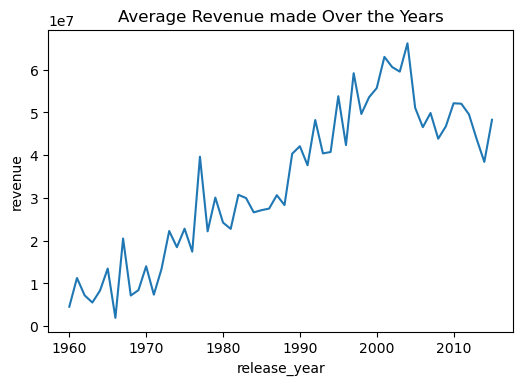

In [43]:
plt.figure(dpi=100)
plt.title('Average Revenue made Over the Years')
sns.lineplot(y=year_revenue,x=year_revenue.index)
plt.show()

From the observed linegraph we could say that there was a steady rise in revenue over years.However, the movie revenue peaked in the year 2004.

<a id='conclusion'></a>
### Conclusion
  #### Summary
From the observed analysis we were able to reach the following conclusions:

* The movie with the highest revenue was Avatar.
* The Drama genre was associated with both movies that made the high revenue and movies that made low revenue.
* Bruce Willis and Roberto de Niro were seen the most in  movies that made  high revenue.
* We also noticed that movies with high revenues tend to have higher median values in budget, vote average and popularity.
* There was steady in crease in revenue over the year but 2004 was the year revenue was highest.
* Werner Bros and Universal pictures are the production companies that are associated with movie with high revenue the most.

  

#### Limitations
During the course of my analysis i encountered the following problems
* Some of the data does not meet real-life standards. For instance they are no movies with the runtime of Zero minutes.
* They were some missing data  which can cause bias  in the estimation of parameter which in turn could complicate the  analysis.

* There was also presence of outliers in most of the features. This could have significant impact on the mean and standard deviation. It can also decrease normality.

